<a href="https://colab.research.google.com/github/20aclaypool/Notes/blob/main/Notebook5_Claypool.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook \#5: SVM, Perceptron, SGD, and PCA
**Due:** Tuesday 11/9, by 11:59pm

Name: Aubrionna Claypool

**Exercises**: \\
Build a **default model** for each of the following and then build a model with **one parameter tuned** (no need to include a graph, just change one parameter that hopefully results in a better model):
1. Support Vector Machines
2. Perceptron
3. Stochastic Gradient Descent
4. Run a PCA on the best model
5. Answer the conclusion questions


In [1]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')
data= pd.read_csv('/content/drive/MyDrive/CS167/datasets/breast-cancer-wisconsin-data.csv')
data.head()

Mounted at /content/drive


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [2]:
#we need to drop the last column 'Unnamed: 32'
data.drop(labels='Unnamed: 32', axis=1, inplace=True)
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


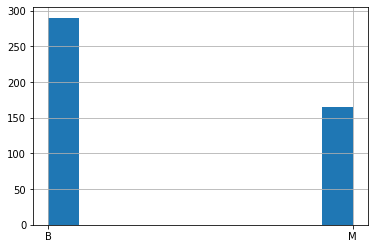

In [3]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


predictors = data.columns.drop('diagnosis')
target = "diagnosis"

train_data, test_data, train_sln, test_sln = train_test_split(data[predictors], data[target], test_size = 0.2, random_state=0)
#Normalize Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)
train_sln.hist()
#now you can use train_data, test_data, train_sln, and test_sln

## Exercises:
1. Support Vector Classifier: \\
  a. Default \\
  b. Tuned

In [4]:
#Default SVC
from sklearn.svm import SVC

clf = SVC()
clf.fit(train_data,train_sln)
predictions = clf.predict(test_data)

print("accuracy:", accuracy_score(test_sln, predictions))
vals = data[target].unique() 
conf_mat = confusion_matrix(test_sln, predictions, labels=vals)
print(pd.DataFrame(conf_mat, index = "T " + vals, columns = "Pred " + vals))

accuracy: 0.9736842105263158
     Pred M  Pred B
T M      45       2
T B       1      66


In [5]:
#Tuned SVC:

clf = SVC(C=13)
clf.fit(train_data,train_sln)
predictions = clf.predict(test_data)

print("accuracy:", accuracy_score(test_sln, predictions))
vals = data[target].unique() 
conf_mat = confusion_matrix(test_sln, predictions, labels=vals)
print(pd.DataFrame(conf_mat, index = "T " + vals, columns = "Pred " + vals))

accuracy: 0.9824561403508771
     Pred M  Pred B
T M      45       2
T B       0      67


2. Perceptron: \\
  a. Default \\
  b. Tuned

In [6]:
#Default Perceptron
from sklearn.linear_model import Perceptron

perc = Perceptron()
perc.fit(train_data,train_sln)
perc_predictions = perc.predict(test_data)

print("accuracy:", accuracy_score(test_sln, perc_predictions))
vals = data[target].unique() 
conf_mat = confusion_matrix(test_sln, perc_predictions, labels=vals)
print(pd.DataFrame(conf_mat, index = "T " + vals, columns = "Pred " + vals))

accuracy: 0.956140350877193
     Pred M  Pred B
T M      45       2
T B       3      64


In [7]:
#Tuned Perceptron
perc = Perceptron(max_iter=6)
perc.fit(train_data,train_sln)
perc_predictions = perc.predict(test_data)

print("accuracy:", accuracy_score(test_sln, perc_predictions))
vals = data[target].unique() 
conf_mat = confusion_matrix(test_sln, perc_predictions, labels=vals)
print(pd.DataFrame(conf_mat, index = "T " + vals, columns = "Pred " + vals))

accuracy: 0.9736842105263158
     Pred M  Pred B
T M      46       1
T B       2      65


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


3. Stochastic Gradient Descent: \\
  a. Default \\
  b. Tuned

In [8]:
#Default SGD
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(train_data,train_sln)
sgd_predictions = sgd.predict(test_data)

print("accuracy:", accuracy_score(test_sln, sgd_predictions))
vals = data[target].unique() 
conf_mat = confusion_matrix(test_sln, sgd_predictions, labels=vals)
print(pd.DataFrame(conf_mat, index = "T " + vals, columns = "Pred " + vals))

accuracy: 0.9473684210526315
     Pred M  Pred B
T M      45       2
T B       4      63


In [25]:
#Tuned SGD
sgd = SGDClassifier(alpha=0.009)
sgd.fit(train_data,train_sln)
sgd_predictions = sgd.predict(test_data)

print("accuracy:", accuracy_score(test_sln, sgd_predictions))
vals = data[target].unique() 
conf_mat = confusion_matrix(test_sln, sgd_predictions, labels=vals)
print(pd.DataFrame(conf_mat, index = "T " + vals, columns = "Pred " + vals))

accuracy: 0.9649122807017544
     Pred M  Pred B
T M      45       2
T B       2      65


3. Now take the model that performed the best above and run a **principal component analysis** on it. 

In [99]:
#PCA on best model
from sklearn.decomposition import PCA

extractor = PCA()
extractor.fit(train_data)

train_transformed = extractor.transform(train_data)
test_transformed = extractor.transform(test_data)

clf = SVC(C=13)
clf.fit(train_transformed,train_sln)
pvc_predictions = clf.predict(test_transformed)
print('Accuracy:',accuracy_score(test_sln,pvc_predictions))
vals = data[target].unique() 
conf_mat = confusion_matrix(test_sln, pvc_predictions, labels=vals)
print(pd.DataFrame(conf_mat, index = "T " + vals, columns = "Pred " + vals))

Accuracy: 0.9824561403508771
     Pred M  Pred B
T M      45       2
T B       0      67


## Conclusions:
a. Which model performed the best? Why do you think this model performed the best? \\
b. What effect did the principal component analysis have on the accuracy of your best model? Why do you think this is the case?

a. Out of all the models, I belive that the tuned SVC did the best because it produced the highest accuracy. However, when it went through the PCA it did not change the the accuracy or even the placement of predictions is the same.

b. It did not change the accuracy of my best model. This may be due the models being as accurate ass possible. It may not be able to correctly predict the last 2 correctly. 